In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import os
from prepare_data import prepare_input

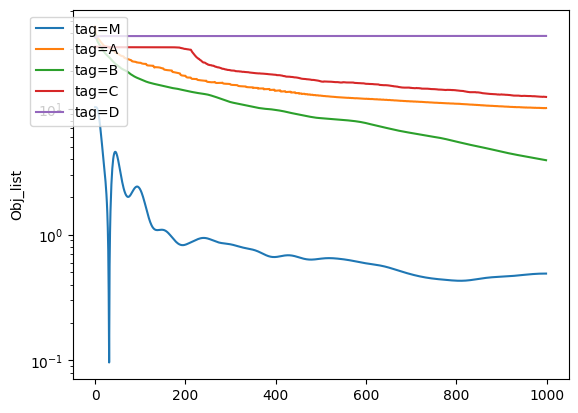

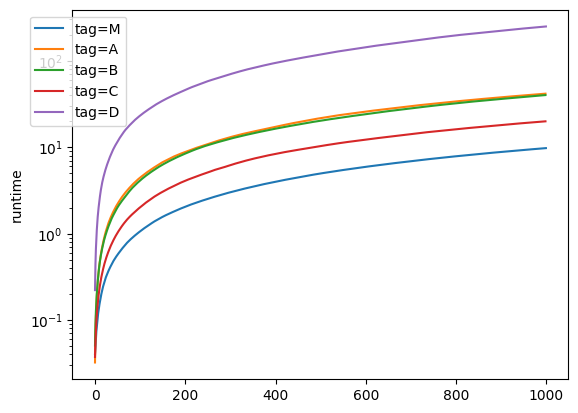

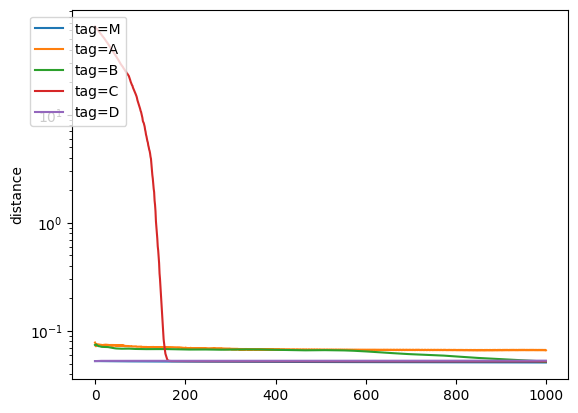

In [14]:
#input ground truth
data_folder = 'data/size60/seed20/'
X = np.fromfile(data_folder + 'exp_number0.npy')
Cost, p, q, s = prepare_input(N=10)
x0 = np.tensordot(p, np.tensordot(q, s, 0), 0)
opt = (X * Cost.reshape(-1)).sum().item()

algs=['M','A','B','C','D']
keys=['Obj_list','runtime','distance']
plt.figure()
for key in keys:
    for alg in algs:
        #input A
        max_iter = 1000

        output_folder = 'output_test/'+'max_iter-'+f'{max_iter}'
        save_folder=os.path.join(output_folder,f'{alg}-{max_iter}')

        
        for i in range(-10,10):
            ep=10**i
            name=os.path.join(save_folder,f'{alg}_{key}{ep}'+'.npy')
            if os.path.exists(name):
                key_value = np.load(name)
            else:
                continue
            if key=='Obj_list':
                plt.plot(abs(key_value-opt),label=f'tag={alg}')
            else:
                plt.plot(key_value,label=f'tag={alg}')    
    plt.ylabel(f'{key}')
    plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
    
    plt.yscale('log')
    plt.show()

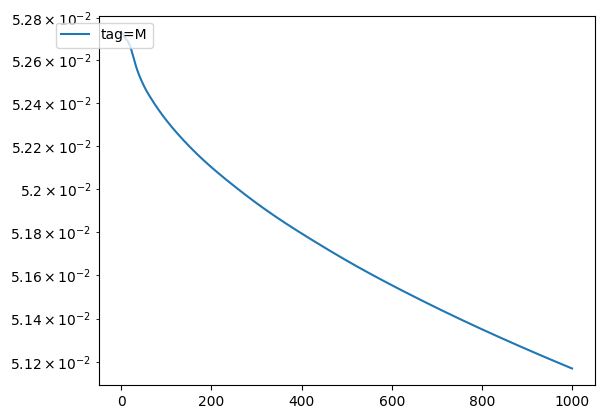

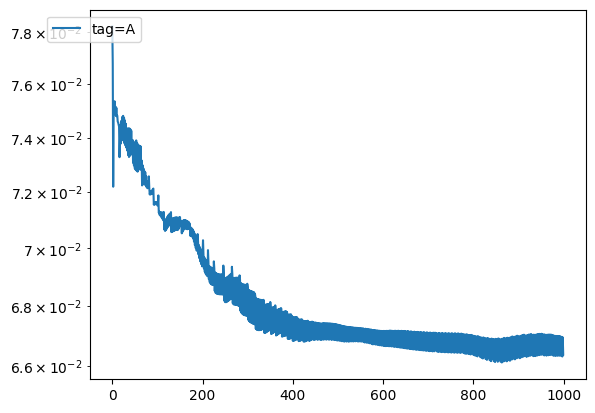

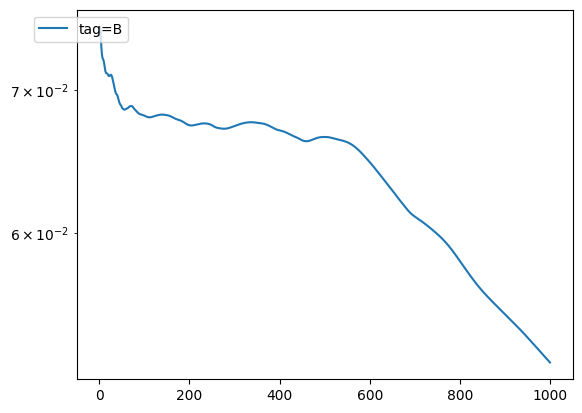

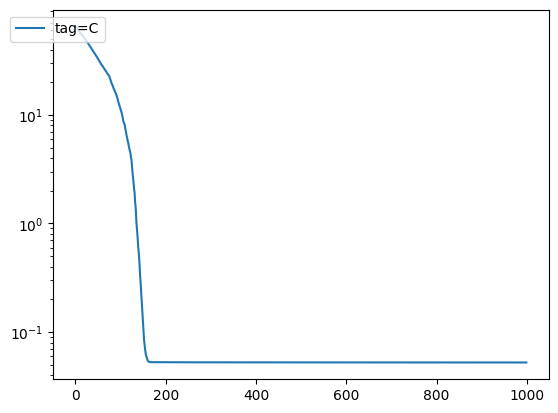

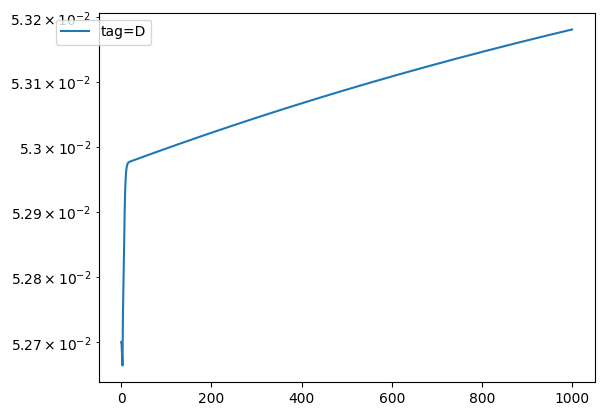

In [12]:
#input ground truth
data_folder = 'data/size60/seed20/'
X = np.fromfile(data_folder + 'exp_number0.npy')
Cost, p, q, s = prepare_input(N=10)
x0 = np.tensordot(p, np.tensordot(q, s, 0), 0)
opt = (X * Cost.reshape(-1)).sum().item()

algs=['M','A','B','C','D']
keys=['Obj_list','runtime','distance']
plt.figure()
key='distance'
for alg in algs:
    #input A
    max_iter = 1000

    output_folder = 'output_test/'+'max_iter-'+f'{max_iter}'
    save_folder=os.path.join(output_folder,f'{alg}-{max_iter}')

    
    for i in range(-10,10):
        ep=10**i
        name=os.path.join(save_folder,f'{alg}_{key}{ep}'+'.npy')
        if os.path.exists(name):
            key_value = np.load(name)
        else:
            continue
        if key=='Obj_list':
            plt.plot(abs(key_value-opt),label=f'tag={alg}')
        else:
            plt.plot(key_value,label=f'tag={alg}') 
        plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
        plt.yscale('log')
        plt.show() 
      
    
    
    
    

In [18]:
max_iter=100
output_folder = 'output_test/'+'max_iter-'+f'{max_iter}'
alg='D'
key='Obj_list'
ep=100
save_folder=os.path.join(output_folder,f'{alg}-{max_iter}')
name=os.path.join(save_folder,f'{alg}_{key}{ep}'+'.npy')
a=np.load(name)
a

array([47.2308363 , 46.79339362, 46.96747918, 47.41085291, 47.73280033,
       47.88379239, 47.90997925, 47.97505665, 48.01112668, 48.03125704,
       48.04281519, 48.04959794, 48.05363205, 48.05605255, 48.05751529,
       48.05840743, 48.05896148, 48.05931965, 48.05957026, 48.05976713,
       48.05994006, 48.06010324, 48.06026259, 48.06042044, 48.06057765,
       48.06073453, 48.0608912 , 48.06104772, 48.06120408, 48.06136031,
       48.06151641, 48.06167236, 48.06182818, 48.06198387, 48.06213942,
       48.06229484, 48.06245012, 48.06260526, 48.06276027, 48.06291515,
       48.0630699 , 48.0632245 , 48.06337898, 48.06353332, 48.06368753,
       48.0638416 , 48.06399554, 48.06414935, 48.06430303, 48.06445657,
       48.06460998, 48.06476325, 48.06491639, 48.06506941, 48.06522228,
       48.06537503, 48.06552765, 48.06568013, 48.06583248, 48.0659847 ,
       48.06613679, 48.06628874, 48.06644057, 48.06659226, 48.06674383,
       48.06689526, 48.06704656, 48.06719773, 48.06734877, 48.06